In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [104]:
def euler(f,x0,deltaT, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    

    x = np.zeros(np.shape(t)) #just setting up the size of the solution

    x[0] = x0

    for ii in range(len(t)):
        if ii > 0: 
            x[ii] = x[ii-1] + deltaT*(f(x[ii-1],t[ii-1])) #simple Euler method

    return x

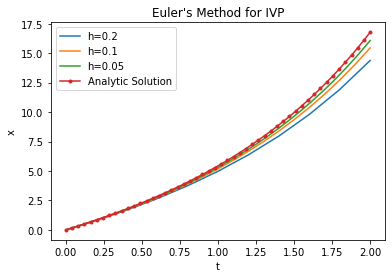

In [105]:
finalT = 2
deltas = [0.2,0.1,0.05]
f = lambda x,t: x - 2 * t + 4

for deltaT in deltas:
    t_vals = np.linspace(0,finalT,int(np.floor(finalT/deltaT))+1)
    sol = euler(f,0,deltaT, t_vals)
    plt.plot(t_vals,sol, label="h="+str(deltaT))
    
g = lambda y: -2 + 2*y + 2*np.exp(y)
plt.plot(np.linspace(0,2,50), g(np.linspace(0,2,50)),marker= ".",label="Analytic Solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("Euler's Method for IVP")
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [106]:
def midpoint(f,x0,deltaT, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
    #this is what Alice wants from problem 2: 
    """ One plot that has h = 0.2, plot on one plot: analytic, euler, runge, midpoint
    Second plot: want log error of euler, midpoint, runge, analytic"""

    x = np.zeros((np.shape(t))) #just setting up the size of the solution

    x[0] = x0

    for ii in range(len(t)):
        if ii > 0: 
            x[ii] = x[ii-1] + deltaT * ( f(x[ii-1] + (deltaT/2)*(f(x[ii-1],t[ii-1])), t[ii-1]+ deltaT/2)) #simple Euler method

    return x
    

def rk4(f,x0,deltaT,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    if type(x0) is  int:
        x = np.zeros(np.shape(t)) #just setting up the size of the solution
        x[0] = x0
    else: 
        x = np.zeros((len(t), len(x0)))
        x[0] = x0
    
    for ii in range(len(t)):
        if ii > 0: 
            #Set up the K values
            k1 = f(x[ii-1],t[ii-1])
            k2 = f(x[ii-1] + (deltaT/2) * k1, t[ii-1] + (deltaT/2))
            k3 = f(x[ii-1] + (deltaT/2)* k2, t[ii-1] + deltaT/2)
            k4 = f(x[ii-1] + deltaT*k3, t[ii])
            
            x[ii] = x[ii-1] + (deltaT/6) * (k1 + 2*k2 + 2*k3 + k4) #Runge Kutta Method

    return x

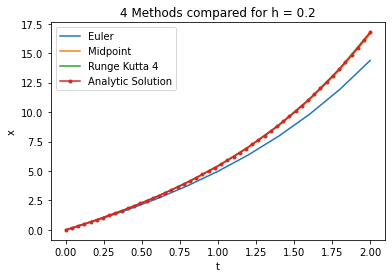

In [107]:
finalT = 2
deltaT = 0.2
f = lambda x,t: x - 2 * t + 4


t_vals = np.linspace(0,finalT,int(np.floor(finalT/deltaT))+1)
solEuler = euler(f,0,deltaT, t_vals)
solMid = midpoint(f,0,deltaT, t_vals)
solRk4 = rk4(f,0,deltaT, t_vals)
plt.plot(t_vals,solEuler, label="Euler")
plt.plot(t_vals,solMid, label="Midpoint")
plt.plot(t_vals,solRk4, label="Runge Kutta 4")

    
g = lambda y: -2 + 2*y + 2*np.exp(y)
plt.plot(np.linspace(0,2,50), g(np.linspace(0,2,50)),marker= ".",label="Analytic Solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("4 Methods compared for h = 0.2")
plt.show()



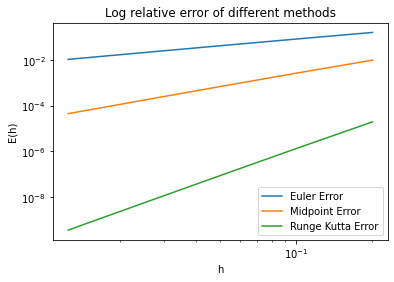

In [108]:
h = [0.2,0.1,0.05,0.025,0.0125]
errorEuler = []
errorMid = []
errorRk4 = []
import math
for deltaT in h:
    t_vals = np.linspace(0,finalT,int(np.floor(finalT/deltaT))+1)
    solEuler = euler(f,0,deltaT, t_vals)
    solMid = midpoint(f,0,deltaT, t_vals)
    solRk4 = rk4(f,0,deltaT, t_vals)
    length = len(solEuler)
    errEul = (np.abs(solEuler[length-1] - g(2))) / math.fabs(solEuler[length-1] )
    errMid = (np.abs(solMid[length-1] - g(2))) / math.fabs(solMid[length-1] )
    errRk = (np.abs(solRk4[length-1] - g(2))) / math.fabs(solRk4[length-1] )
    errorEuler.append(errEul)
    errorMid.append(errMid)
    errorRk4.append(errRk)
plt.loglog(h, errorEuler, label="Euler Error")
plt.loglog(h, errorMid, label="Midpoint Error")
plt.loglog(h, errorRk4, label="Runge Kutta Error")
plt.xlabel("h")
plt.ylabel("E(h)")
plt.title("Log relative error of different methods")
plt.legend()
plt.show()


## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

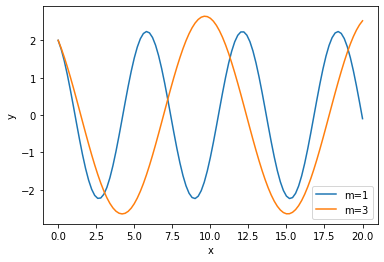

In [109]:
#h = 0.2, also for #4 and #5
deltaT = 0.2
finalT = 20
t_vals = np.linspace(0,finalT,int(np.floor(finalT/deltaT))+1)
k = 1
m=1

f= lambda y,t: np.array([y[1], (-1/1) * y[0]])
solRk = rk4(f, np.array([2,-1]),deltaT, t_vals) #k=1,m=1
plt.plot(t_vals, solRk.T[0],label="m=1")
g= lambda y,t: np.array([y[1], (-1/3) * y[0]])
solRk2 = rk4(g, np.array([2,-1]), deltaT, t_vals)
plt.plot(t_vals, solRk2.T[0],label="m=3")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

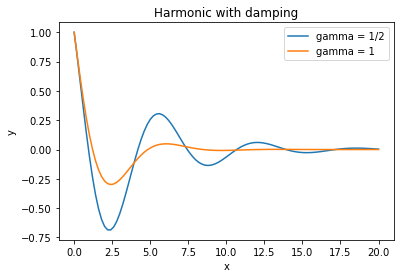

In [110]:
gamma = 1/2
deltaT = 0.2
finalT = 20
t_vals = np.linspace(0,finalT,int(np.floor(finalT/deltaT))+1)


f= lambda y,t: np.array([y[1], (-gamma * y[1]) - y[0]])
solRk = rk4(f, np.array([1,-1]),deltaT, t_vals) #k=1,m=1
plt.plot(t_vals, solRk.T[0],label="gamma = 1/2")
gamma = 1
g= lambda y,t: np.array([y[1], (-gamma * y[1]) - y[0]])
solRk2 = rk4(g, np.array([1,-1]),deltaT, t_vals) #k=1,m=1
plt.plot(t_vals, solRk2.T[0],label="gamma = 1")
plt.title("Harmonic with damping")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

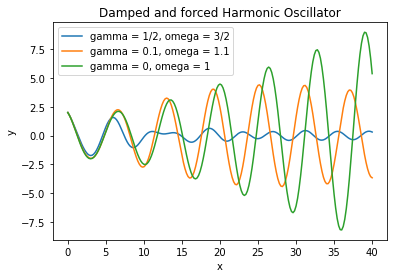

In [111]:
gamma = 1/2
omega = 3/2
deltaT = 0.2
finalT = 40
t_vals = np.linspace(0,finalT,int(np.floor(finalT/deltaT))+1)


f= lambda y,t: np.array([y[1], 0.5*((-gamma * y[1]) - 2*y[0] + np.cos(omega*t))])

solRk = rk4(f, np.array([2,-1]),deltaT, t_vals) #initial value is 2, -1
plt.plot(t_vals, solRk.T[0],label="gamma = 1/2, omega = 3/2")

#Second set of values
gamma = 0.1
omega = 1.1
g= lambda y,t: np.array([y[1], 0.5*((-gamma * y[1]) - 2*y[0] + np.cos(omega*t))])
solRk2 = rk4(g, np.array([2,-1]),deltaT, t_vals) #Initial value is 2, -1
plt.plot(t_vals, solRk2.T[0],label="gamma = 0.1, omega = 1.1")


#Third set of values
gamma = 0
omega = 1
g= lambda y,t: np.array([y[1], 0.5*((-gamma * y[1]) - 2*y[0] + np.cos(omega*t))])
solRk2 = rk4(g, np.array([2,-1]),deltaT, t_vals) #Initial value is 2, -1
plt.plot(t_vals, solRk2.T[0],label="gamma = 0, omega = 1")
plt.title("Damped and forced Harmonic Oscillator")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()